In [1]:
# 라이브러리 불러오기
from PIL import Image
import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

81  images to be resized.
81  images resized.
가위 이미지 resize 완료!


In [4]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

95  images to be resized.
95  images resized.
바위 이미지 resize 완료!


In [5]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

138  images to be resized.
138  images resized.
보 이미지 resize 완료!


In [23]:
import numpy as np

def load_data(img_path, number_of_data=314):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 314 입니다.
x_train shape: (314, 28, 28, 3)
y_train shape: (314,)


라벨:  0


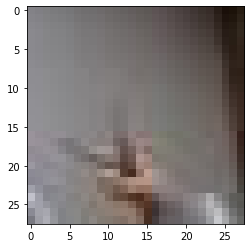

In [24]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                51216     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [27]:
model.fit(x_train_norm, y_train, epochs=30, validation_split=0.3)

Epoch 1/30
7/7 [==============================] - 0s 10ms/step - loss: 1.7293 - accuracy: 0.3242 - val_loss: 3.4375 - val_accuracy: 0.0000e+00
Epoch 2/30
7/7 [==============================] - 0s 6ms/step - loss: 1.2469 - accuracy: 0.4201 - val_loss: 1.7152 - val_accuracy: 0.0000e+00
Epoch 3/30
7/7 [==============================] - 0s 6ms/step - loss: 1.0148 - accuracy: 0.5616 - val_loss: 1.1918 - val_accuracy: 0.0000e+00
Epoch 4/30
7/7 [==============================] - 0s 6ms/step - loss: 0.9351 - accuracy: 0.6301 - val_loss: 1.0020 - val_accuracy: 0.0000e+00
Epoch 5/30
7/7 [==============================] - 0s 6ms/step - loss: 0.8059 - accuracy: 0.7123 - val_loss: 1.3040 - val_accuracy: 0.0000e+00
Epoch 6/30
7/7 [==============================] - 0s 8ms/step - loss: 0.6193 - accuracy: 0.7945 - val_loss: 1.3898 - val_accuracy: 0.0000e+00
Epoch 7/30
7/7 [==============================] - 0s 7ms/step - loss: 0.4310 - accuracy: 0.8128 - val_loss: 0.8933 - val_accuracy: 0.2105
Epoch 8/3

In [ ]:
회고

가위바위보 사진들은 같은 수업을 수강하는 선아님의 사진들을 받아서 사용했다. 
처음 해보는 프로젝트라 쉽지 않았다. 
